<a href="https://colab.research.google.com/github/rachioko/Data-Analysis-with-Python/blob/master/2018_LA_Parking_Citation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set()
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#import csv and make time data type string
df  = pd.read_csv("/content/drive/My Drive/Lucky Parking/Data/Parking_Citations_After_July_1_2015.csv", dtype = {'Issue time':str})
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4361370075,2019/09/17 12:00:00 AM,817,NaN,NaN,LA,NaN,MERC,PA,RD,1324 84TH PL W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.471017e+06,1.808559e+06
1,4361370064,2019/09/17 12:00:00 AM,811,VM48,NaN,CA,NaN,BUIC,PA,GN,1000 85TH ST W,00551,55.0,88.13B+,METER EXP.,63,6.473192e+06,1.808298e+06
2,4361370053,2019/09/17 12:00:00 AM,809,NaN,NaN,CA,NaN,TOYT,PA,GY,1000 85TH ST W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473192e+06,1.808298e+06
3,4361370042,2019/09/17 12:00:00 AM,805,NaN,NaN,CA,NaN,NISS,PA,BK,8021 VERMONT AVE,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473164e+06,1.810388e+06
4,4361370031,2019/09/17 12:00:00 AM,727,NaN,NaN,CA,NaN,HOND,PA,GY,1473 45TH ST W,00551,55.0,22500E,BLOCKING DRIVEWAY,68,6.469917e+06,1.823537e+06


In [4]:
#Have a look at the numericals of the data
df.describe()


,Marked Time,VIN,Agency,Latitude,Longitude
count,281350.000000,0.0,8.706402e+06,8.706410e+06,8.706410e+06
mean,1054.397949,NaN,5.201589e+01,5.626516e+06,1.620590e+06
std,228.109367,NaN,9.294210e+00,2.140816e+06,5.896023e+05
min,1.000000,NaN,1.000000e+00,9.999900e+04,9.999900e+04
25%,909.000000,NaN,5.100000e+01,6.423748e+06,1.826133e+06
50%,1036.000000,NaN,5.400000e+01,6.453452e+06,1.842363e+06
75%,1200.000000,NaN,5.500000e+01,6.475619e+06,1.858228e+06
max,2400.000000,NaN,9.700000e+01,6.514332e+06,1.942669e+06


In [5]:
#check each data type
df.dtypes

Ticket number             object
Issue Date                object
Issue time                object
Meter Id                  object
Marked Time              float64
RP State Plate            object
VIN                      float64
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount               object
Latitude                 float64
Longitude                float64
dtype: object

In [6]:
#inspect how many null values each column might have
df.apply(lambda x: sum(x.isna()),axis = 0)

Ticket number                  0
Issue Date                     0
Issue time                  2167
Meter Id                 6520291
Marked Time              8425062
RP State Plate               375
VIN                      8706412
Make                        7690
Body Style                  8478
Color                       3536
Location                     346
Route                      63715
Agency                        10
Violation code                 0
Violation Description        890
Fine amount                 5919
Latitude                       2
Longitude                      2
dtype: int64

Feature Engineering

In [0]:
#change the datatypes 
df['Fine amount'] = pd.to_numeric(df['Fine amount'], errors="coerce") #change string to float
df['Issue Date'] = pd.to_datetime(df['Issue Date']) #change string to datetime
df['Time'] = pd.to_datetime(df['Issue time'], format= '%H%M', errors= "coerce").dt.time #change time in new column

In [0]:
#split data into metered and non metered  
temp = {True:'Meter', False : 'No Meter'}
df['Meter']= (df['Meter Id'].notna()).map(temp)
 
#create an hour feature
df['Hour'] = df['Time'].apply(lambda x: x.hour) 

#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Weekday'] = df['Issue Date'].apply(lambda x : weekdays[x.weekday()])

In [0]:
df['Year'] = df['Issue Date'].apply(lambda x : x.year)
df['Month'] = df['Issue Date'].apply(lambda x : x.month)


In [10]:
#remove columns with too many none entries. 
del df['VIN']
del df['Marked Time']
#remove the columns that I don't think are neccessary for this analysis
df= df.drop(["Ticket number","Issue time",	"Meter Id",	"RP State Plate",	"Make",	"Body Style",	"Color","Route",	"Agency",	"Latitude",	"Longitude"], axis = 1)
df.head()

,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
0,2019-09-17,1324 84TH PL W,80.69BS,NO PARK/STREET CLEAN,73.0,08:17:00,No Meter,8.0,Tuesday,2019,9
1,2019-09-17,1000 85TH ST W,88.13B+,METER EXP.,63.0,08:11:00,Meter,8.0,Tuesday,2019,9
2,2019-09-17,1000 85TH ST W,80.69BS,NO PARK/STREET CLEAN,73.0,08:09:00,No Meter,8.0,Tuesday,2019,9
3,2019-09-17,8021 VERMONT AVE,80.69BS,NO PARK/STREET CLEAN,73.0,08:05:00,No Meter,8.0,Tuesday,2019,9
4,2019-09-17,1473 45TH ST W,22500E,BLOCKING DRIVEWAY,68.0,07:27:00,No Meter,7.0,Tuesday,2019,9


#Analysis For 2018 Parking Citations

In [11]:
df_2018 = df[df['Year'] == 2018]
df_2018.head()


,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
1175207,2018-12-31,8862 VAN NUYS BLVD,80.69BS,NO PARK/STREET CLEAN,73.0,08:32:00,No Meter,8.0,Monday,2018,12
1175208,2018-12-31,1032 MAHAR,4000A1,NO EVIDENCE OF REG,50.0,13:35:00,No Meter,13.0,Monday,2018,12
1175209,2018-12-31,500 WORLD WAY U/L,8939,WHITE CURB,58.0,07:00:00,No Meter,7.0,Monday,2018,12
1175210,2018-12-31,400 WORLD WAY U/L,8939,WHITE CURB,58.0,04:45:00,No Meter,4.0,Monday,2018,12
1175211,2018-12-31,600 W/W L/L,8936,RED CURB,93.0,11:35:00,No Meter,11.0,Monday,2018,12


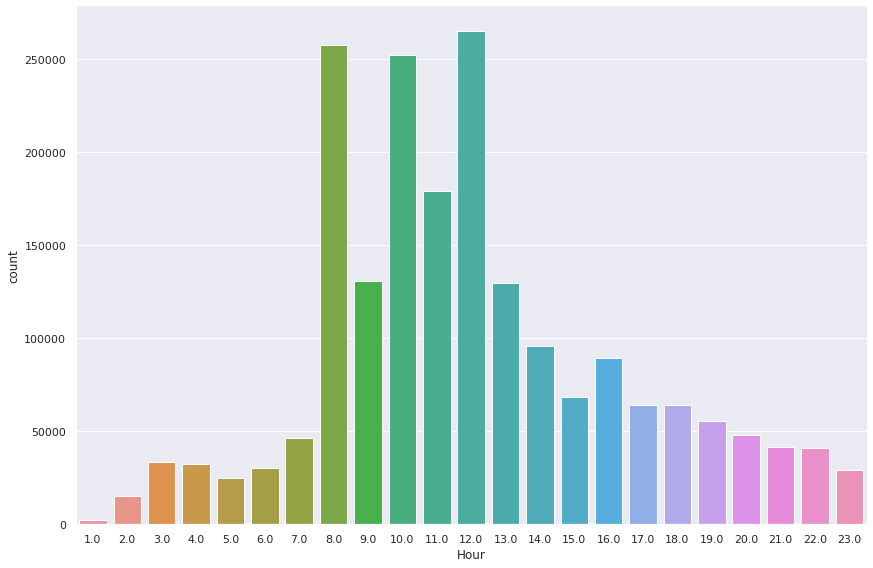

In [13]:
sns.catplot('Hour', data=df_2018, kind = 'count', height=8, aspect=12/8)

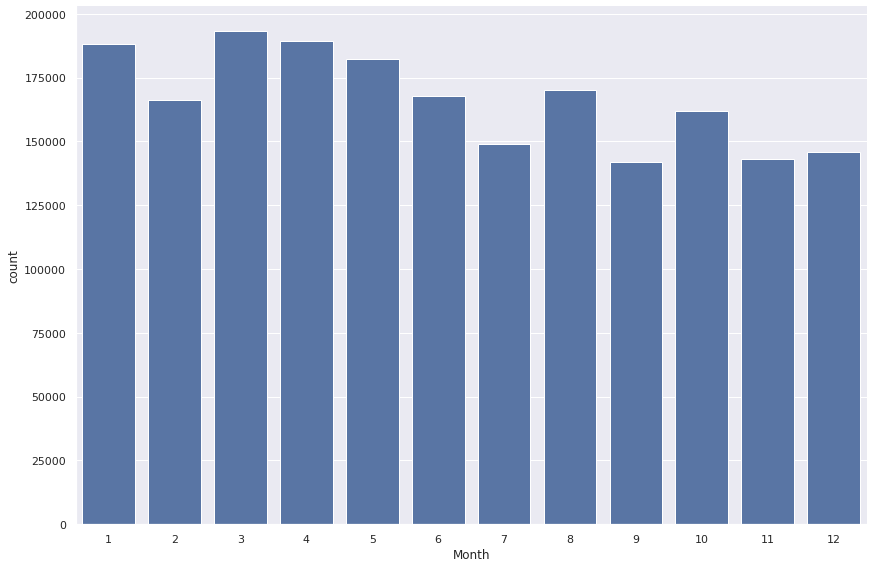

In [14]:
sns.catplot('Month', data=df_2018, kind = 'count', color = 'b', height=8, aspect=12/8)

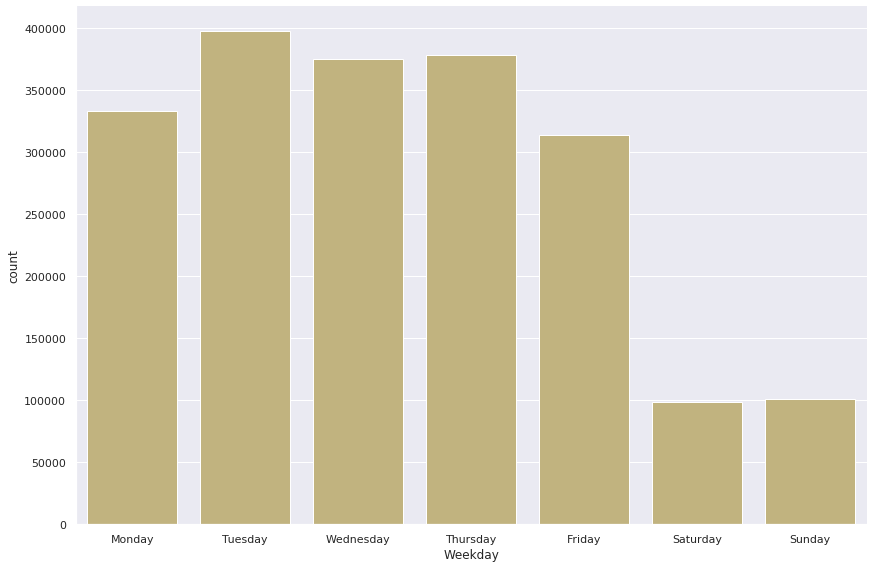

In [15]:
sns.catplot('Weekday', data=df_2018, kind = 'count', color ='y', order = weekdays, height=8, aspect=12/8)

In [16]:
df_2018['Violation Description'].describe()

count                  1998580
unique                     432
top       NO PARK/STREET CLEAN
freq                    594548
Name: Violation Description, dtype: object

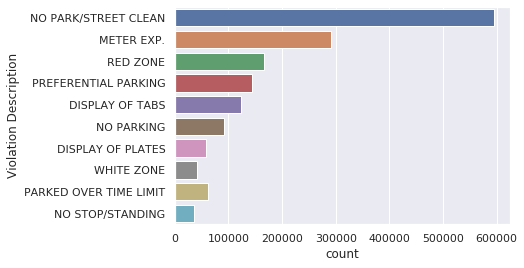

In [17]:
top_violations = df['Violation Description'].value_counts(ascending=False).index[:10]
sns.countplot(y="Violation Description", data=df_2018, order=top_violations)

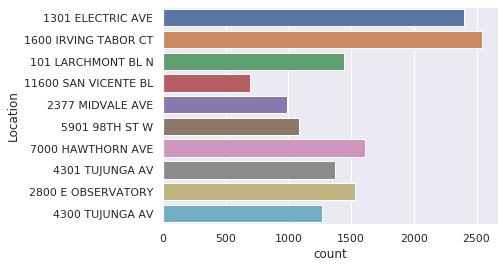

In [18]:
top_locations = df['Location'].value_counts(ascending=False).index[:10]
sns.countplot(y="Location", data=df_2018, order= top_locations)

In [19]:
#top day and fewest
date_df = df_2018.groupby('Issue Date')['Issue Date'].count().reset_index(name = 'Count')
date_df


,Issue Date,Count
0,2018-01-01,1261
1,2018-01-02,9130
2,2018-01-03,7705
3,2018-01-04,8034
4,2018-01-05,6908
...,...,...
360,2018-12-27,7217
361,2018-12-28,1563
362,2018-12-29,1448
363,2018-12-30,2043


<Figure size 1440x720 with 0 Axes>

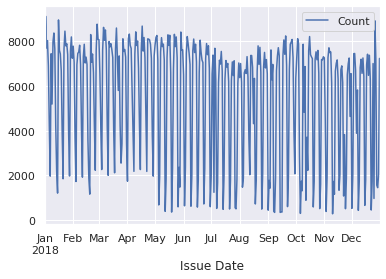

In [20]:
plt.figure(figsize=(20,10))
date_df.plot(x='Issue Date', y = 'Count')

In [21]:
top_violations_df = df_2018[df_2018['Violation Description'].isin(top_violations)]

top_violations_df.head()

,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
1175207,2018-12-31,8862 VAN NUYS BLVD,80.69BS,NO PARK/STREET CLEAN,73.0,08:32:00,No Meter,8.0,Monday,2018,12
1175229,2018-12-31,6201 MULHOLLAND HWY,8069B,NO PARKING,73.0,13:30:00,No Meter,13.0,Monday,2018,12
1175230,2018-12-31,6201 MULHOLLAND HWY,8069B,NO PARKING,73.0,13:28:00,No Meter,13.0,Monday,2018,12
1175234,2018-12-31,3200 N CANYON LAKE,8056E4,RED ZONE,93.0,13:02:00,No Meter,13.0,Monday,2018,12
1175262,2018-12-31,6001 GUTHRIE,8069BS,NO PARK/STREET CLEAN,73.0,08:43:00,No Meter,8.0,Monday,2018,12


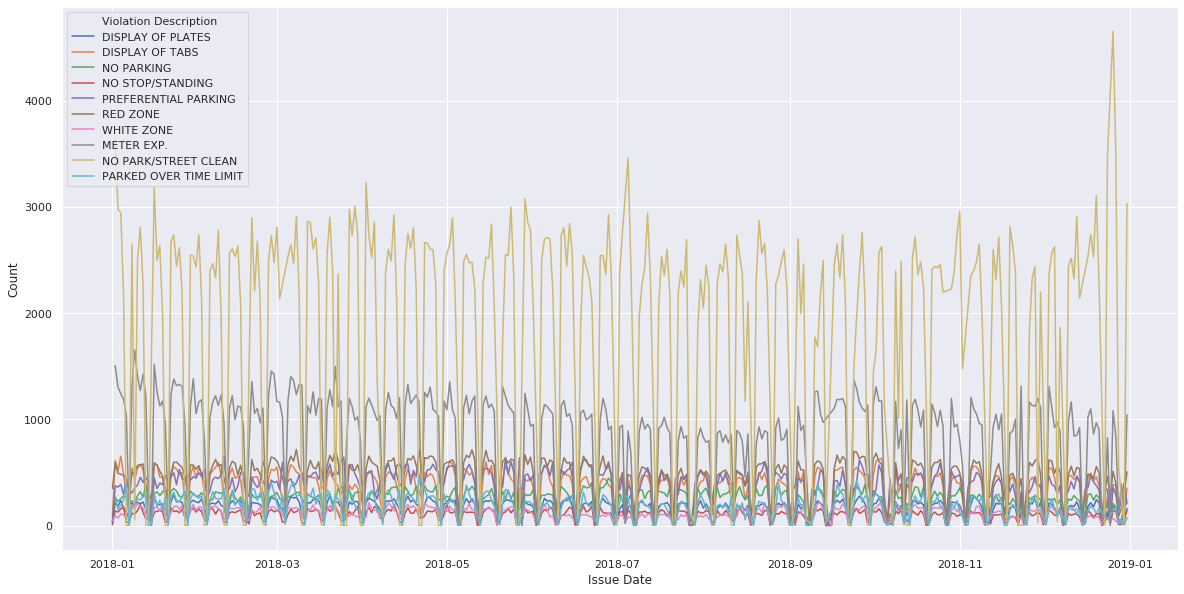

In [22]:
top_10_group = top_violations_df.set_index('Issue Date')
top_10_date = top_violations_df.groupby(['Issue Date', 'Violation Description'])['Issue Date'].count().reset_index(name = 'Count')
top_10_date.head()

plt.figure(figsize=(20,10))
sns.lineplot(x='Issue Date', y= 'Count', hue= 'Violation Description', data=top_10_date)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


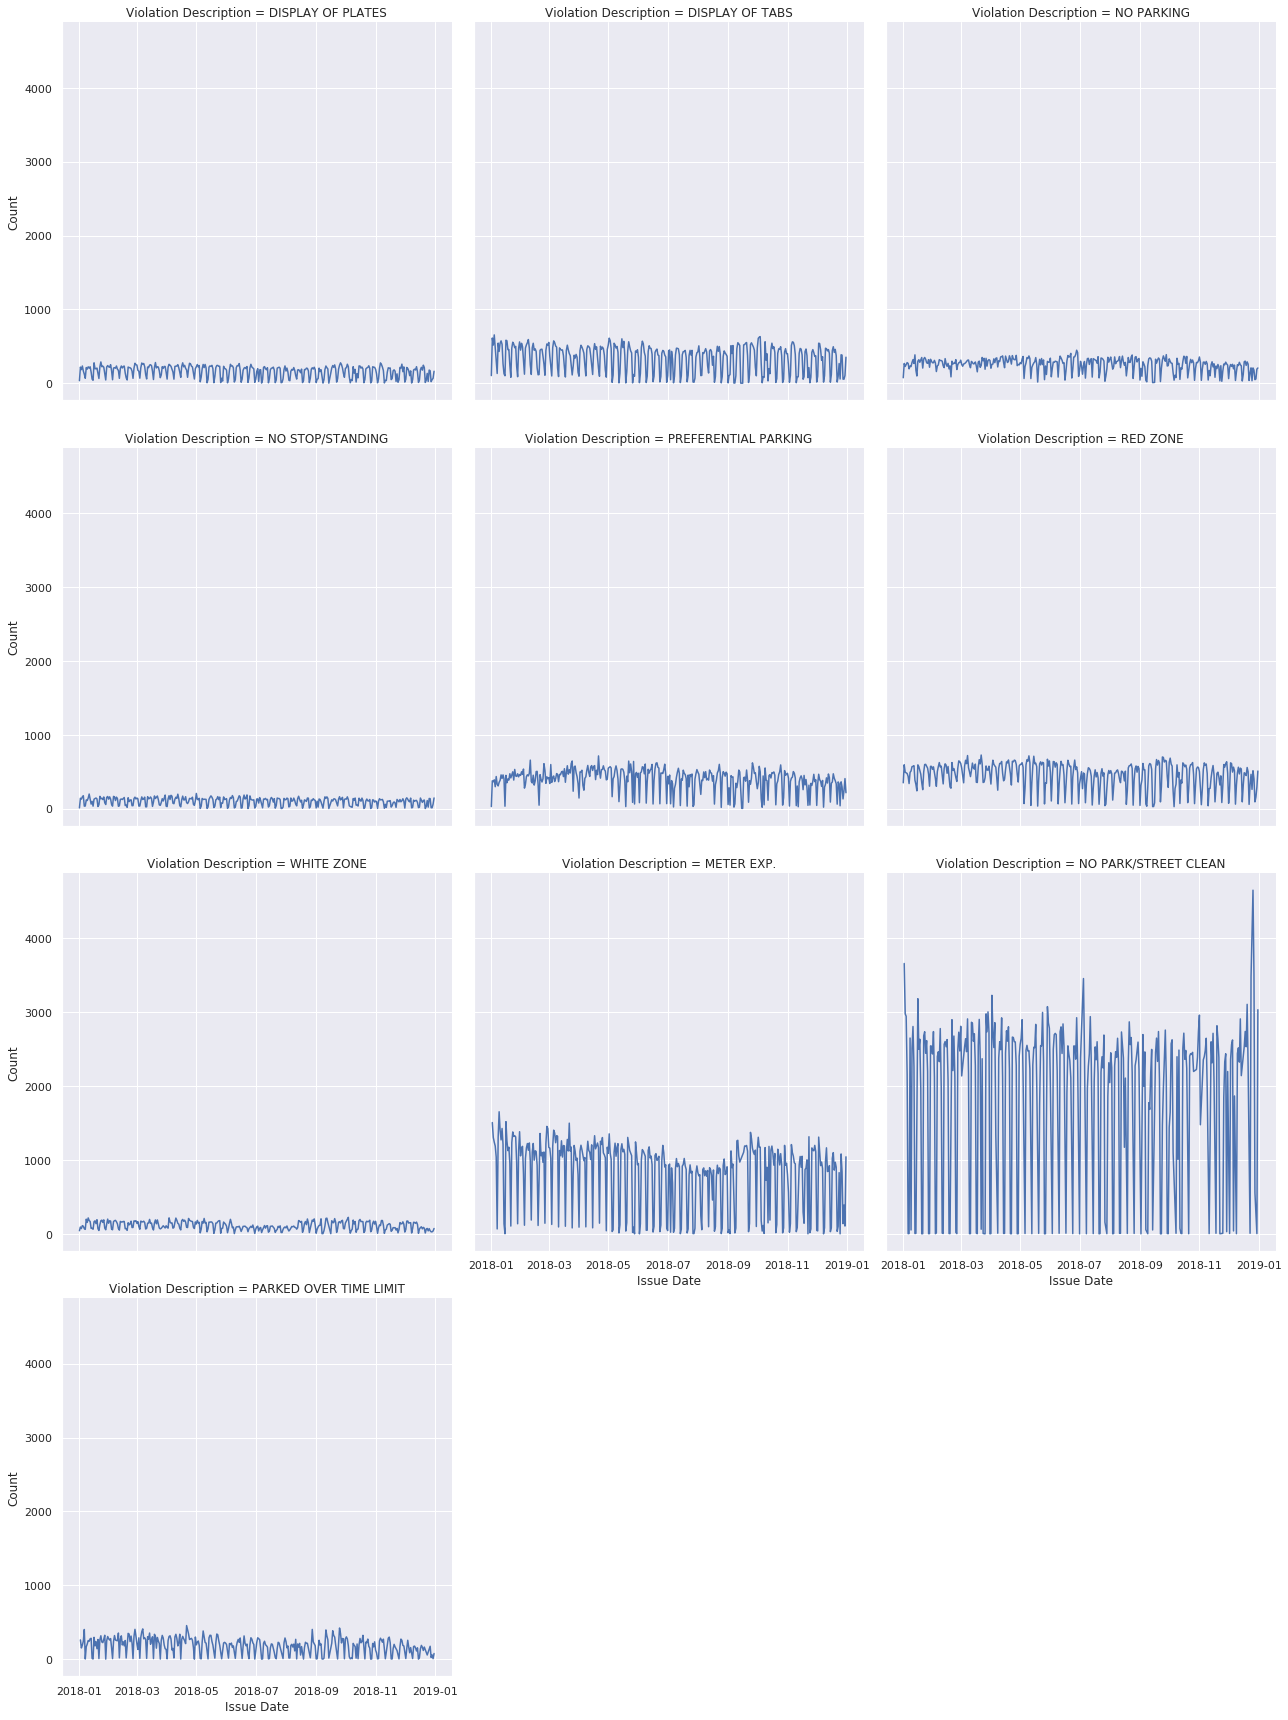

In [27]:
grid = sns.FacetGrid(data= top_10_date, col= 'Violation Description', col_wrap= 3, size=6)
grid.map(sns.lineplot, "Issue Date", "Count")

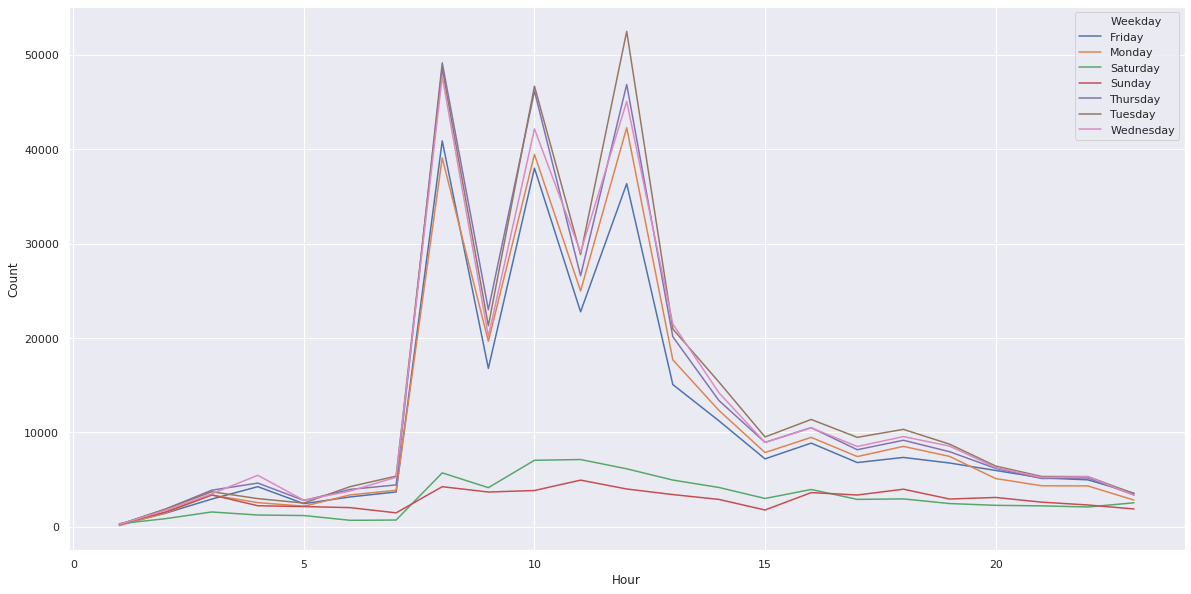

In [23]:
top_10_hour = top_violations_df.groupby(['Hour', 'Weekday'])['Hour'].count().reset_index(name = 'Count')
top_10_hour.head()
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Weekday', data=top_10_hour)

In [24]:
grid_df = top_violations_df.groupby(['Hour', 'Weekday','Violation Description'])['Hour'].count().reset_index(name = 'Count')
grid_df.head()

,Hour,Weekday,Violation Description,Count
0,1.0,Friday,DISPLAY OF PLATES,12
1,1.0,Friday,DISPLAY OF TABS,10
2,1.0,Friday,NO PARKING,29
3,1.0,Friday,NO STOP/STANDING,4
4,1.0,Friday,PREFERENTIAL PARKING,94


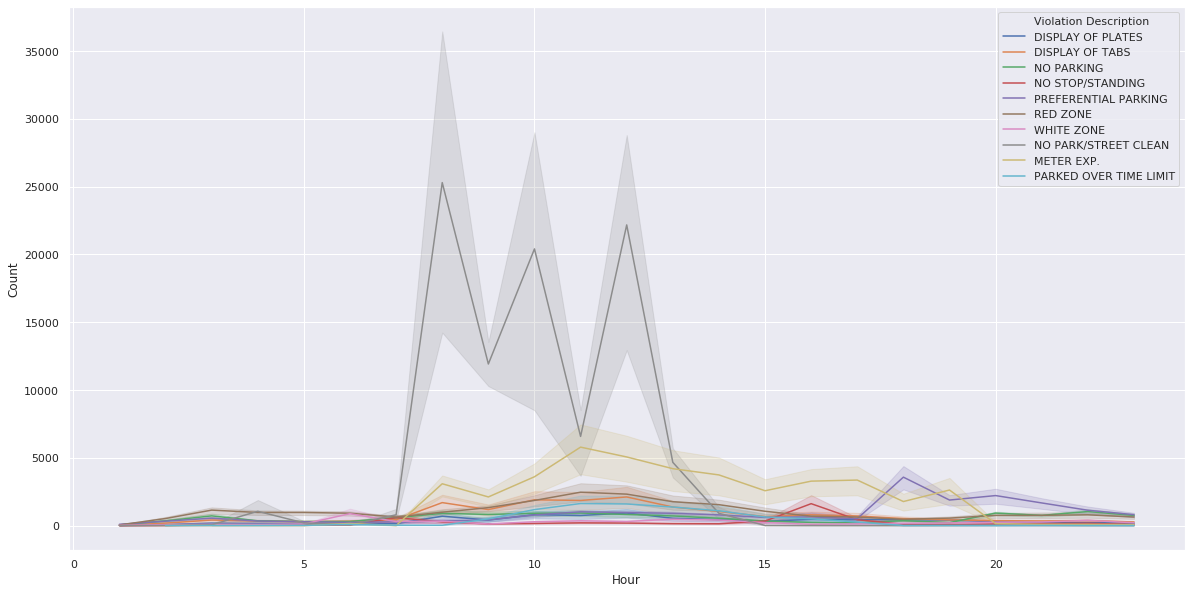

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Violation Description', data=grid_df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


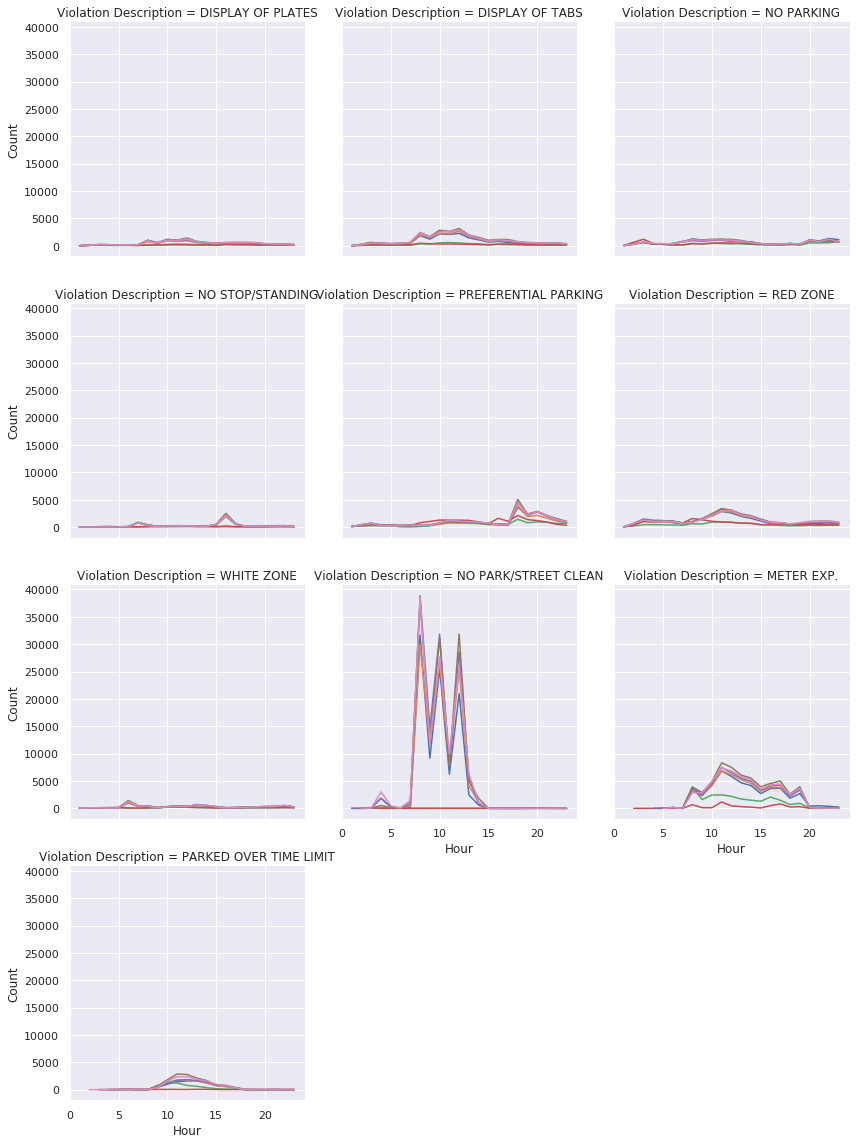

In [26]:
grid = sns.FacetGrid(data= grid_df, hue='Weekday', col= 'Violation Description', col_wrap= 3, size=4)
grid.map(sns.lineplot, "Hour", "Count")